In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from tqdm import tqdm

In [2]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0, cluster_std=2)

In [3]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

kmeans_labels = kmeans.predict(X)

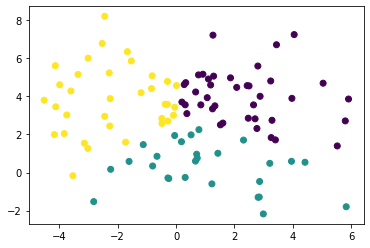

In [4]:
plt.scatter(X[:,0],X[:,1],c=kmeans_labels)

plt.show()

Disadvantages of KMeans Clustering are that:
1. Forms spherical clusters - data-points within a cluster can be in any arbitrary fashion (for e.g. elliptical)
2. Doesn't account for uncertainity in cluster assignment of data points. 
    - One way of doing this is to look at uncertainity as proportional to distance of point from cluster center. 
    - Another way is to run KMeans on bootstrapped samples and then calculate probabilities.
    
**Gaussian Mixture Models can help overcome these limitations.**

In [5]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3)

gmm.fit(X)
gmm_labels = gmm.predict(X)

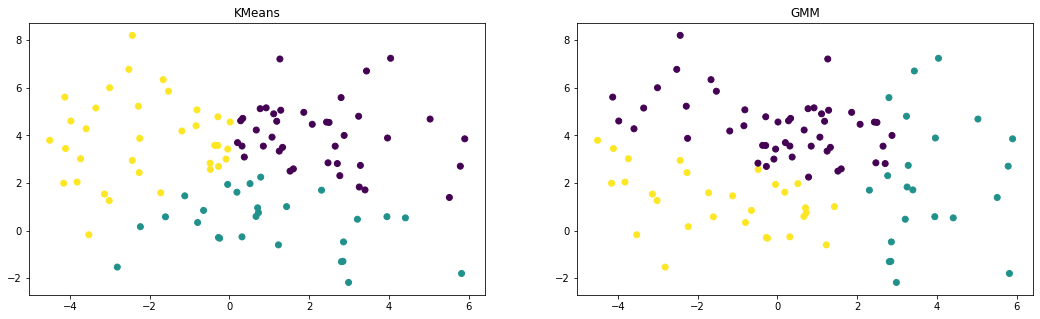

In [6]:
figure=plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('KMeans')
plt.scatter(X[:,0],X[:,1],c=kmeans_labels)

plt.subplot(122)
plt.title('GMM')
plt.scatter(X[:,0],X[:,1],c=gmm_labels)

plt.show()

**We can also look at the uncertainity of cluster assignment through size of the points.**

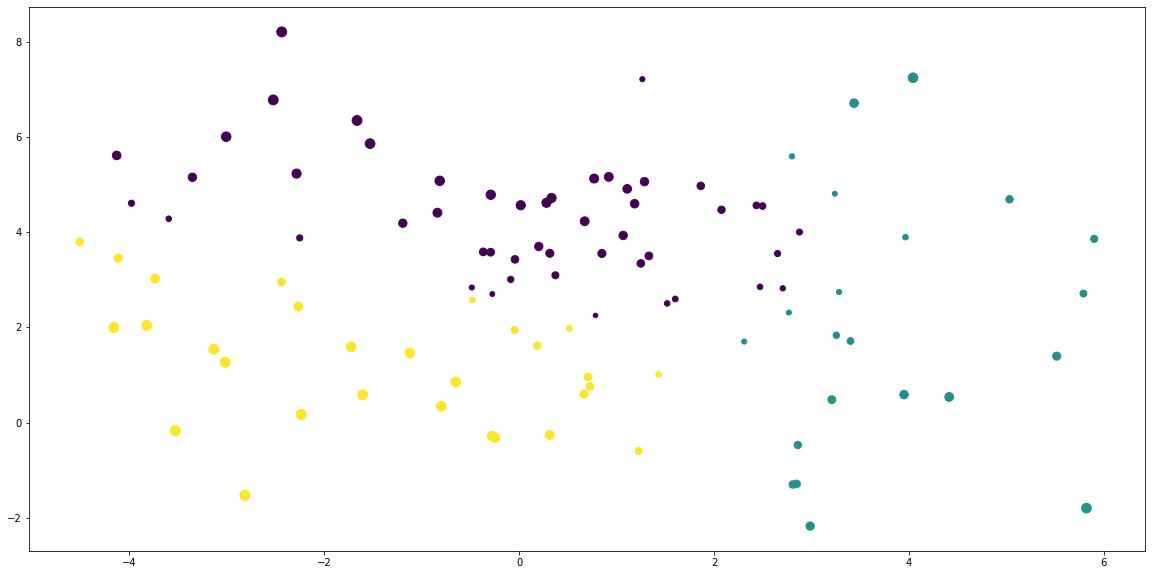

In [7]:
fig = plt.figure(figsize=(20,10))

probs = gmm.predict_proba(X)
size = 100 * (np.max(probs,axis=1))**2

plt.scatter(X[:,0],X[:,1],c=gmm_labels,s=size)
plt.show()

**We can notice some datapoints have higher uncertainity than others due to size difference.**

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

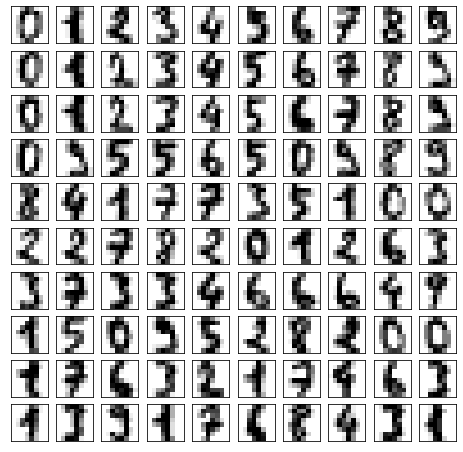

In [9]:
fig, ax = plt.subplots(10,10, figsize=(8,8), subplot_kw=dict(xticks=[], yticks=[]))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.data[i].reshape(8,8), cmap='binary')

In [10]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:18<00:00,  1.15s/it]


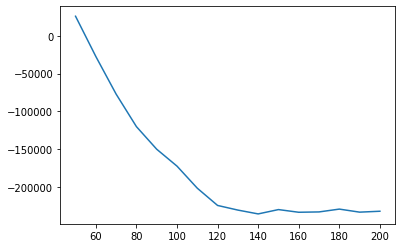

In [11]:
n_components = np.arange(50, 210, 10)

AIC=[]
for n in tqdm(n_components):
    model = GMM(n, covariance_type='full', random_state=0)
    model.fit(data)
    
    aic_score = model.aic(data)
    AIC.append(aic_score)
    
plt.plot(n_components, AIC)
plt.show()

**Least value of AIC occurs at n_components as 140.**

In [12]:
gmm = GMM(n_components = 140, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [13]:
n_data_points=100

sample = gmm.sample(n_data_points)
sample

(array([[ 0.2133255 , -0.6598359 , -2.01921421, ...,  1.3868519 ,
         -1.15403726,  0.06537873],
        [ 0.47568832,  1.48560749,  0.10235803, ..., -0.51371645,
         -1.11763107, -1.09598779],
        [ 2.02629192,  0.41383058, -1.03366417, ..., -0.81837679,
         -0.12359882, -0.37477985],
        ...,
        [ 1.77492153,  0.06274978, -0.96683592, ..., -0.54602171,
         -0.6396166 , -0.12343836],
        [-1.86755317,  0.24744981,  0.02683037, ..., -1.10519926,
         -0.36749179,  0.34742484],
        [ 0.37429209,  1.17327585, -0.50544421, ...,  1.28783222,
          0.09176098, -0.5643794 ]]),
 array([  1,   2,   3,   4,   5,   6,   7,   7,   8,   8,   8,   9,  10,
         10,  11,  13,  13,  17,  17,  18,  18,  19,  20,  20,  21,  22,
         23,  25,  27,  31,  32,  35,  37,  38,  38,  38,  39,  40,  42,
         44,  45,  49,  50,  52,  52,  52,  56,  66,  66,  68,  68,  68,
         70,  70,  70,  70,  71,  72,  72,  72,  74,  80,  81,  88,  89,
        

In [14]:
digits_new = pca.inverse_transform(sample[0])
digits_new.shape

(100, 64)

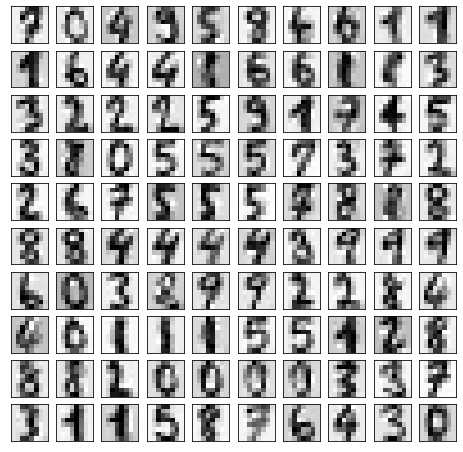

In [15]:
fig, ax = plt.subplots(10,10, figsize=(8,8), subplot_kw=dict(xticks=[], yticks=[]))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits_new[i].reshape(8,8), cmap='binary')

**Hence, GMM can be used to generate samples from a learnt distribution. It's a generative model.** 

Other examples of generative models are:

1. LDA (Linear Discriminant Analysis) / QDA (Quadratic Discriminant Analysis)
2. GAN (Generative Adversarial Networks)
3. VAE (Variational Autoencoders)